In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Optimized Cirquit found in Sources

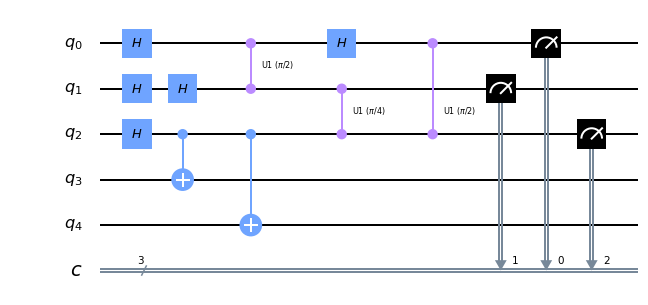

In [2]:
qc = QuantumCircuit(5, 3)

qc.h(0)
qc.h(1)
qc.h(2)
qc.cx(2,3)
qc.cx(2,4)
qc.h(1)
qc.cu1(np.pi/2, 1,0)
qc.h(0)
qc.cu1(np.pi/4, 1,2)
qc.cu1(np.pi/2, 0,2)
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)

qc.draw('mpl')

In [3]:
provider = IBMQ.get_provider(hub='ibm-q')
backendSim = provider.get_backend('ibmq_qasm_simulator')
backendDev = provider.get_backend('ibmq_london')

In [4]:
shots = 1024
resultsSim = execute(qc, backend=backendSim, shots=shots).result()
resultsDev = execute(qc, backend=backendDev, shots=shots).result()
answerSim = resultsSim.get_counts()
answerDev = resultsDev.get_counts()

## Results

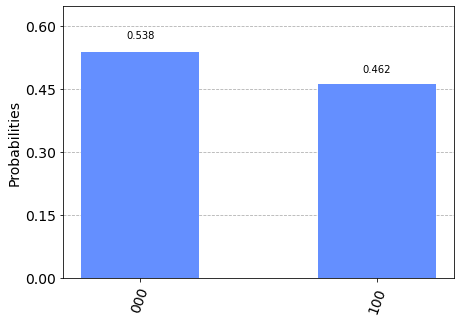

In [5]:
plot_histogram(answerSim)

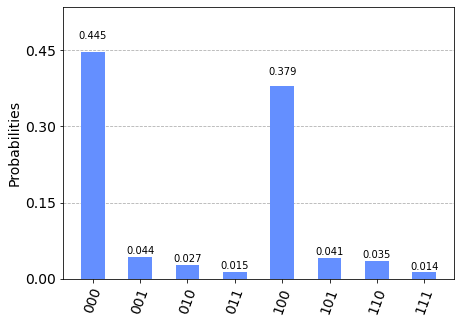

In [6]:
plot_histogram(answerDev)

# My own implementation of a QFT and Shor's algorithm

## QFT

In [7]:
def qft(qc, qbits):
    n = len(qbits)
    if n > 1:
        qft(qc, qbits[1:n])
    for i in range(n-1, 0, -1):
        qc.cu1(np.pi/(2**i), qbits[0], qbits[i])
    qc.h(qbits[0])
    qc.barrier() #barrier only for aestetic purposes

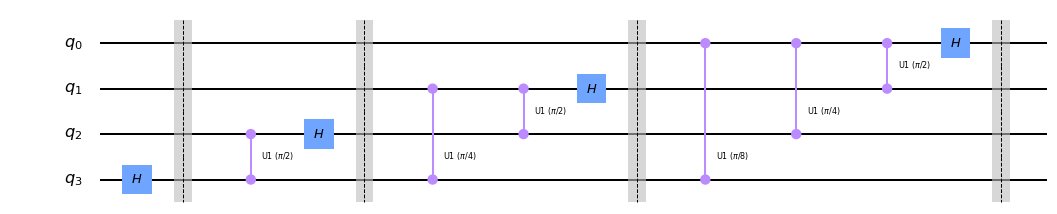

In [8]:
qftCirq = QuantumCircuit(4)
qft(qftCirq, [0,1,2,3])
qftCirq.draw('mpl')

In [10]:
myQFT = qftCirq.to_instruction()
myQFT.name = "   MyOwnQFT   "

## Shor's algorithm for N = 15, x = 4

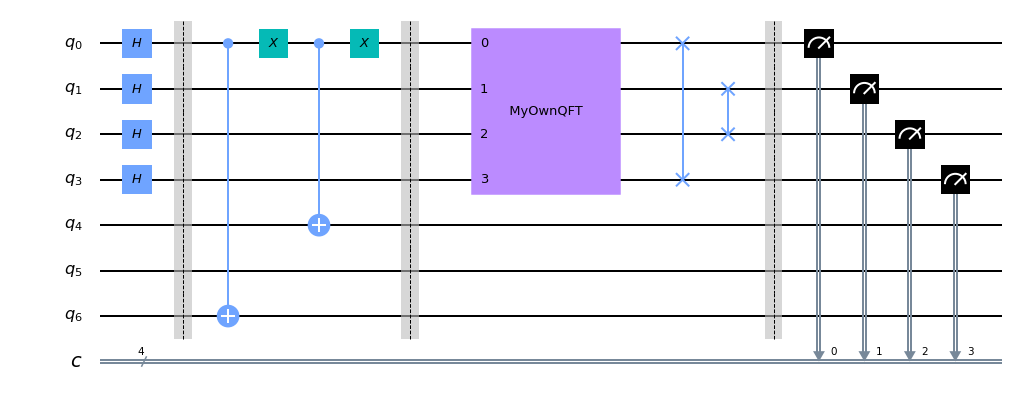

In [11]:
shors = QuantumCircuit(7,4)
#getting superposition on first 4 qubits
for i in range(4):
    shors.h(i)
shors.barrier()
#exponentiation function
shors.cx(0,6)
shors.x(0)
shors.cx(0,4)
shors.x(0)
shors.barrier()
#appending the QFT
shors.append(myQFT, [0,1,2,3])
shors.swap(0,3)
shors.swap(1,2) #swaps seccesary because of nature of QFT
shors.barrier()
#measurements
for i in range(4):
    shors.measure(i,i)
shors.draw('mpl')

In [12]:
shots = 1024
resultsShorSim = execute(shors, backend=backendSim, shots=shots).result()
answerShorSim = resultsShorSim.get_counts()

## Results

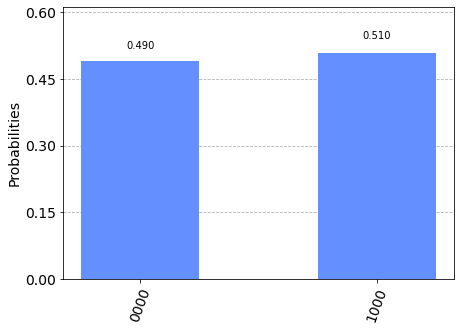

In [13]:
plot_histogram(answerShorSim)

In [14]:
backendDev = provider.get_backend('ibmq_16_melbourne')
resultsShorDev = execute(shors, backend=backendDev, shots=shots).result()
answerShorDev = resultsShorDev.get_counts()

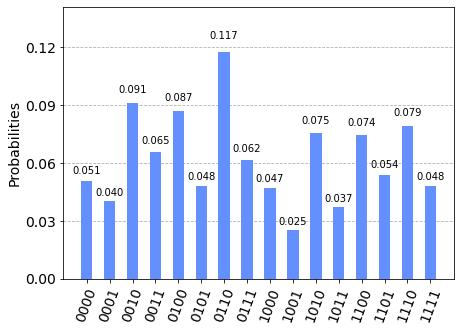

In [15]:
plot_histogram(answerShorDev)